In [91]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import requests

cities = pd.read_csv('data/cities.csv')
providers = pd.read_csv('data/providers.csv')
stations = pd.read_csv('data/stations.csv')
ticket_data = pd.read_csv('data/ticket_data.csv')

Je me familiarise d'abord avec les donées.


Je suppose qu'il n'y a pas de données erronées.


In [64]:
cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [65]:
providers.head()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [66]:
stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [67]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [68]:
providers['id'].max()

8389

In [69]:
providers['id'].count()

227

In [70]:
providers['transport_type'].unique()

array(['bus', 'car', 'train', 'carpooling'], dtype=object)

## Quelques stats basiques sur les tickets

### Les prix

In [71]:
print("Prix max : " + str(ticket_data['price_in_cents'].max()/100) + " euros")
print("Prix min : " + str(ticket_data['price_in_cents'].min()/100) + " euros")
print("Prix moyen : " + str(round(ticket_data['price_in_cents'].mean()/100, 1)) + " euros")

Prix max : 385.5 euros
Prix min : 3.0 euros
Prix moyen : 43.8 euros


### La durée

In [72]:
ticket_data['departure_ts2'] = pd.to_datetime(ticket_data['departure_ts'], format='%Y-%m-%d %H:%M:%S')
ticket_data['arrival_ts2'] = pd.to_datetime(ticket_data['arrival_ts'], format='%Y-%m-%d %H:%M:%S')
ticket_data['duree'] = ticket_data['arrival_ts2'] - ticket_data['departure_ts2']

In [73]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,0 days 06:10:00
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,0 days 17:50:00
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,1 days 07:57:00
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,0 days 21:35:00
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,0 days 21:46:00


In [74]:
print("Durée max : " + str(ticket_data['duree'].max()))
print("Durée min : " + str(ticket_data['duree'].min()))
print("Durée moyenne : " + str(ticket_data['duree'].mean()))

Durée max : 20 days 12:51:00
Durée min : 0 days 00:20:00
Durée moyenne : 0 days 07:04:37.247600043


Je m'assure ici de bien comprendre à quoi correspondent les colonnes 'id' des dataframes stations et cities, qu'on peut faire des jointures dessus.

Et je supprime les colonnes 'departure_ts', 'arrival_ts', 'search_ts' en créant une nouvelle dataframe new_ticket_data pour une meilleure visibilité. Cette dataframe va contenir les lattitudes et longitudes des stations de départ et d'arrivée.

In [75]:
new_ticket_data = ticket_data.drop(['departure_ts', 'arrival_ts', 'search_ts'], axis=1)
new_ticket_data.sort_values(by='o_station').head()


,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
11043,6806074,13,3.0,509.0,3090,"{598,598}",{13},628,712,2017-10-06 10:00:00+00:00,2017-10-06 19:40:00+00:00,0 days 09:40:00
33895,6828920,13,3.0,273.0,4000,"{173,173}",{13},628,23,2017-10-13 22:55:00+00:00,2017-10-14 09:00:00+00:00,0 days 10:05:00
34230,6829254,13,3.0,489.0,2000,"{304,304}",{13},628,587,2017-10-30 02:40:00+00:00,2017-10-30 12:35:00+00:00,0 days 09:55:00
34334,6829330,13,3.0,489.0,2000,"{304,304}",{13},628,587,2017-10-30 02:40:00+00:00,2017-10-30 12:35:00+00:00,0 days 09:55:00
34377,6829400,13,3.0,489.0,2000,"{304,304}",{13},628,587,2017-10-30 02:40:00+00:00,2017-10-30 12:35:00+00:00,0 days 09:55:00


In [76]:
print(stations.loc[stations['id'] == 63])
print(stations.loc[stations['id'] == 1044])
print(stations.loc[stations['id'] == 5905])
print(stations.loc[stations['id'] == 6495])
print(cities.loc[cities['id'] == 611])
print(cities.loc[cities['id'] == 542])

    id              unique_name   latitude  longitude
62  63  Avenue Georges Pompidou  47.896911   1.854277
        id          unique_name   latitude  longitude
1043  1044  Station Les Sabines  43.583932   3.860233
        id  unique_name  latitude  longitude
5904  5905  Les Aubrais  47.92674    1.90674
        id  unique_name  latitude  longitude
6494  6495  Montpellier   43.6049     3.8805
       id                            local_name unique_name   latitude  \
4070  611  Orléans, Centre-Val de Loire, France     orleans  47.907018   

      longitude  population  
4070    1.90627    114977.0  
       id                      local_name  unique_name   latitude  longitude  \
2630  542  Montpellier, Occitanie, France  montpellier  43.604452   3.918318   

      population  
2630    275318.0  


In [77]:
new_ticket_data = pd.merge(stations, new_ticket_data, left_on='id', right_on='o_station')

new_ticket_data.rename(columns={'old_name': 'new_name', 'latitude':'lat1', 'longitude':'lon1'}, inplace=True)
new_ticket_data.sort_values(by='o_station').head()

,id_x,unique_name,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
0,3,Aéroport CDG,49.0099,2.55931,6795079,9,3.0,396.0,1590,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00
170,3,Aéroport CDG,49.0099,2.55931,6839803,13,3.0,304.0,2890,"{863,863}",{13},628,562,2017-10-21 15:30:00+00:00,2017-10-22 08:00:00+00:00,0 days 16:30:00
171,3,Aéroport CDG,49.0099,2.55931,6840176,13,3.0,39.0,1200,"{396,396}",{13},628,37,2017-10-26 12:20:00+00:00,2017-10-26 19:40:00+00:00,0 days 07:20:00
172,3,Aéroport CDG,49.0099,2.55931,6840179,13,3.0,39.0,1590,"{396,396}",{13},628,37,2017-10-26 14:30:00+00:00,2017-10-26 21:15:00+00:00,0 days 06:45:00
173,3,Aéroport CDG,49.0099,2.55931,6840175,9,3.0,39.0,1600,"{396,396}",{13},628,37,2017-10-26 13:05:00+00:00,2017-10-26 19:40:00+00:00,0 days 06:35:00


In [78]:
new_ticket_data = pd.merge(stations, new_ticket_data, left_on='id', right_on='d_station')
new_ticket_data.rename(columns={'latitude':'lat2', 'longitude':'lon2'}, inplace=True)
new_ticket_data = new_ticket_data.drop(['unique_name_x', 'unique_name_y'], axis=1)
new_ticket_data.sort_values(by='o_station').head()

,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree
31146,8926,52.421347,13.177278,3,49.0099,2.55931,6795457,13,3.0,8926.0,4750,"{475,475}",{13},628,99,2017-10-21 22:10:00+00:00,2017-10-22 15:20:00+00:00,0 days 17:10:00
7856,396,50.638756,3.076675,3,49.0099,2.55931,6807925,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00
7857,396,50.638756,3.076675,3,49.0099,2.55931,6808616,9,3.0,396.0,1590,"{406,406}",{13},628,453,2017-10-13 12:30:00+00:00,2017-10-13 16:40:00+00:00,0 days 04:10:00
7858,396,50.638756,3.076675,3,49.0099,2.55931,6808874,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00
7859,396,50.638756,3.076675,3,49.0099,2.55931,6809472,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00



## Calcul des distances

J'utilise ici la formule de Haversine, pour un calcul des distances entre la station de départ et d'arrivée à vol d'oiseau.

In [79]:
def distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    a = sin((lat2 - lat1) / 2) ** 2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c

    return distance

new_ticket_data['distance'] = new_ticket_data.apply(lambda row: distance(row['lat1'], row['lon1'], row['lat2'], row['lon2']), axis=1)
new_ticket_data.sort_values(by='o_station').head()

,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree,distance
31146,8926,52.421347,13.177278,3,49.0099,2.55931,6795457,13,3.0,8926.0,4750,"{475,475}",{13},628,99,2017-10-21 22:10:00+00:00,2017-10-22 15:20:00+00:00,0 days 17:10:00,837.18529
7856,396,50.638756,3.076675,3,49.0099,2.55931,6807925,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00,184.88257
7857,396,50.638756,3.076675,3,49.0099,2.55931,6808616,9,3.0,396.0,1590,"{406,406}",{13},628,453,2017-10-13 12:30:00+00:00,2017-10-13 16:40:00+00:00,0 days 04:10:00,184.88257
7858,396,50.638756,3.076675,3,49.0099,2.55931,6808874,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00,184.88257
7859,396,50.638756,3.076675,3,49.0099,2.55931,6809472,9,3.0,396.0,1890,"{406,406}",{13},628,453,2017-10-06 12:30:00+00:00,2017-10-06 16:40:00+00:00,0 days 04:10:00,184.88257


Distance max : 1865.5 km
Distance min : 16.6 km
Distance moyenne : 432.8 km


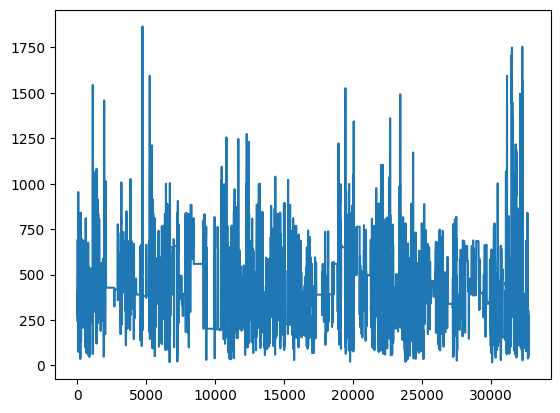

In [80]:
plt.plot(new_ticket_data['distance'])
print("Distance max : " + str(round(new_ticket_data['distance'].max(), 1)) + " km")
print("Distance min : " + str(round(new_ticket_data['distance'].min(), 1)) + " km")
print("Distance moyenne : " + str(round(new_ticket_data['distance'].mean(), 1)) + " km")

## Calcul des distances avec l'API MapBox

La formule Haversine donne bien sûr une idée des distances, mais les routes sont rarement des lignes droites, donc je vais utiliser une API pour mesurer les distances d'une façon plus précise.

J'ai considéré l'utilisation de l'API de Google Maps ou celle de MapBox et ai choisi la dernière, car sa documentation et son utilisation m'ont paru plus claires. C'est la première fois que j'utilise cette API.

In [19]:
token = 'pk.eyJ1IjoicmFuZHltYWdudW0iLCJhIjoiY2xmZnlidm53MTE2NzQ2bHI2NDZzczhpNyJ9.tgeKBJ2IC3ZpI1Y_ucePGw'

Nombre de lignes de new_tiket_data, pour s'assurer que tout marche bien par la suite.

In [56]:
new_ticket_data.shape[0]

32727

In [54]:
def calcule_distance(df, token, limit):
        count = 0
        result = []
        for index, row in df.iterrows():
                url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
                url = url + str(row['lon1']) + ',' + str(row['lat1']) + ';' + str(row['lon2']) + ',' + str(row['lat2'])
                params = {'access_token': token}

                response = requests.get(url, params=params)

                
                data = response.json()
                
                # si l'API n'arrive pas a calculer la distance
                if (data['code'] == 'NoSegment'): 
                        result.append([row['lon1'], row['lat1'], row['lon2'], row['lat2']], 'NaN' 'Nan')
                # si tout se passe bien
                else:
                        distance = data['routes'][0]['distance']/1000 # pour un resultat en km
                        duration = data['routes'][0]['duration']/3600 # pour un resultat en heures
                        result.append([row['lon1'], row['lat1'], row['lon2'], row['lat2'], distance, duration])
                        count = count + 1
                        if (count >= limit):
                                print("Nombre limite de requetes atteint.")
                                return result
                if (count%1000 == 0):
                        print(str(count) + " lignes traitees")
        print("La dataframe a ete entierement traitee.")
        return result


res = calcule_distance(new_ticket_data.sort_values(by='lon1'), token, 33000) # on limite a 33000 pour couvrir toute la dataframe new_ticket_data qui fait 32727 lignes
# les calculs ont pris 27m 53.7s

1000 lignes traitees
2000 lignes traitees
3000 lignes traitees
4000 lignes traitees
5000 lignes traitees
6000 lignes traitees
7000 lignes traitees
8000 lignes traitees
9000 lignes traitees
10000 lignes traitees
11000 lignes traitees
12000 lignes traitees
13000 lignes traitees
14000 lignes traitees
15000 lignes traitees
16000 lignes traitees
17000 lignes traitees
18000 lignes traitees
19000 lignes traitees
20000 lignes traitees
21000 lignes traitees
22000 lignes traitees
23000 lignes traitees
24000 lignes traitees
25000 lignes traitees
26000 lignes traitees
27000 lignes traitees
28000 lignes traitees
29000 lignes traitees
30000 lignes traitees
31000 lignes traitees
32000 lignes traitees
La dataframe a ete entierement traitee.


On s'assure que la liste avec les distances et durées issues de la MapBox API est bien remplie.

In [55]:
len(res)

32727

In [81]:
new_ticket_data.sort_values(by='lon1').head()

,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree,distance
31552,9985,38.767842,-9.099345,10185,41.144308,-8.605693,6801795,13,10185.0,9985.0,8490,"{896,896}",{13},2245,1918,2017-10-06 06:50:00+00:00,2017-10-07 15:40:00+00:00,1 days 08:50:00,267.578375
3176,273,52.389289,4.836263,422,48.387490,-4.482140,6848501,13,422.0,273.0,7390,"{279,279}",{13},148,23,2017-12-29 09:10:00+00:00,2017-12-30 14:25:00+00:00,1 days 05:15:00,795.562246
6126,322,50.624050,5.568636,422,48.387490,-4.482140,6818028,8376,422.0,322.0,13700,"{6799,1898}",{8384},148,451,2017-10-25 11:30:00+00:00,2017-10-25 20:11:00+00:00,0 days 08:41:00,766.430573
6127,322,50.624050,5.568636,422,48.387490,-4.482140,6818029,8376,422.0,322.0,10200,"{6799,1898}",{8384},148,451,2017-10-25 09:06:00+00:00,2017-10-25 18:11:00+00:00,0 days 09:05:00,766.430573
6128,322,50.624050,5.568636,422,48.387490,-4.482140,6818030,8376,422.0,322.0,14000,"{6799,1898}",{8384},148,451,2017-10-25 12:21:00+00:00,2017-10-25 20:11:00+00:00,0 days 07:50:00,766.430573


In [82]:
distance_MapBox = []
duree_MapBox = []
for i in res:
    distance_MapBox.append(i[4])
    duree_MapBox.append(i[5])
print(len(distance_MapBox))
print(distance_MapBox[0:20])

new_ticket_data = new_ticket_data.sort_values(by='lon1')

new_ticket_data['distance_MapBox'] = distance_MapBox
new_ticket_data['duree_MapBox'] = duree_MapBox

new_ticket_data.head()

32727
[307.84215600000005, 1053.282875, 912.767062, 912.767062, 912.767062, 1053.282875, 1053.282875, 1053.282875, 1053.282875, 186.22175, 186.22175, 186.22175, 912.767062, 186.22175, 186.22175, 186.22175, 186.22175, 186.22175, 186.22175, 186.22175]


,id,lat2,lon2,id_x,lat1,lon1,id_y,company,o_station,d_station,...,middle_stations,other_companies,o_city,d_city,departure_ts2,arrival_ts2,duree,distance,distance_MapBox,duree_MapBox
31552,9985,38.767842,-9.099345,10185,41.144308,-8.605693,6801795,13,10185.0,9985.0,...,"{896,896}",{13},2245,1918,2017-10-06 06:50:00+00:00,2017-10-07 15:40:00+00:00,1 days 08:50:00,267.578375,307.842156,3.001290
3176,273,52.389289,4.836263,422,48.387490,-4.482140,6848501,13,422.0,273.0,...,"{279,279}",{13},148,23,2017-12-29 09:10:00+00:00,2017-12-30 14:25:00+00:00,1 days 05:15:00,795.562246,1053.282875,10.480174
6126,322,50.624050,5.568636,422,48.387490,-4.482140,6818028,8376,422.0,322.0,...,"{6799,1898}",{8384},148,451,2017-10-25 11:30:00+00:00,2017-10-25 20:11:00+00:00,0 days 08:41:00,766.430573,912.767062,8.868849
6127,322,50.624050,5.568636,422,48.387490,-4.482140,6818029,8376,422.0,322.0,...,"{6799,1898}",{8384},148,451,2017-10-25 09:06:00+00:00,2017-10-25 18:11:00+00:00,0 days 09:05:00,766.430573,912.767062,8.868849
6128,322,50.624050,5.568636,422,48.387490,-4.482140,6818030,8376,422.0,322.0,...,"{6799,1898}",{8384},148,451,2017-10-25 12:21:00+00:00,2017-10-25 20:11:00+00:00,0 days 07:50:00,766.430573,912.767062,8.868849


On remarque que les dsitances réelles sont plus importantes que celles d'à vol d'oiseau. Dans mes calculs je n'ai pas pris en compte les escales qui pourraient encore plus rallonger les distances.

On remarque aussi que dans certains cas la durée de voyage proposée par MaxBox est très inférieure à celle déjà présente dans la base de données. Ceci est dû aux arrêts et aux escales qui ne sont pas pris en compte dans mes calculs. Et aussi, la voiture est en général plus rapide que le bus, et tous les trajets que j'ai calculés sont calculés pour des voitures.

In [58]:
resres = res

Distribution des distances

(array([ 5310., 10103.,  9069.,  6059.,  1500.,   417.,   161.,    47.,
           49.,    12.]),
 array([  23.983 ,  252.0133,  480.0436,  708.0739,  936.1042, 1164.1345,
        1392.1648, 1620.1951, 1848.2254, 2076.2557, 2304.286 ]),
 <BarContainer object of 10 artists>)

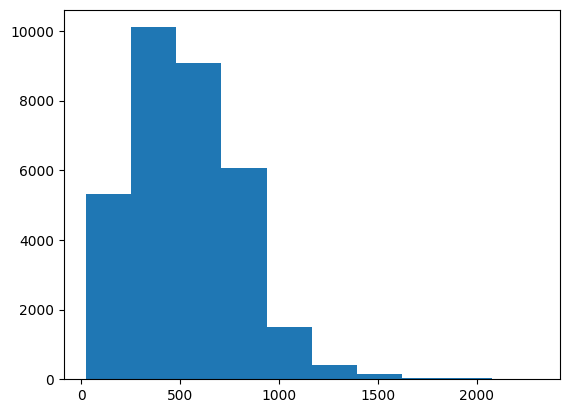

In [90]:
#bins = [200, 800, 2000, 3000]
#plt.hist(new_ticket_data['distance_MapBox'], bins=bins)
plt.hist(new_ticket_data['distance_MapBox'])

On remarque que la majorité des distances ont des valeurs autours de 500km.

Text(0, 0.5, 'Prix en euros')

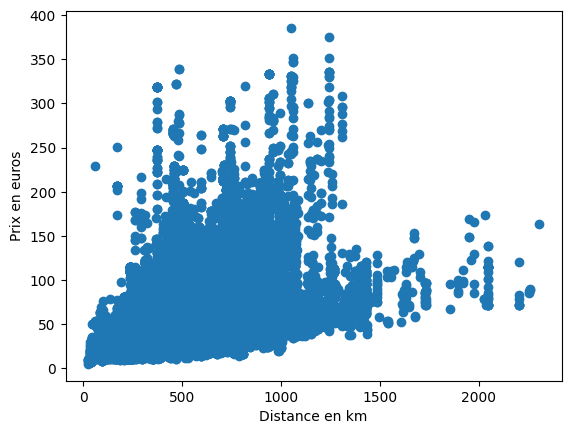

In [87]:
plt.scatter(new_ticket_data['distance_MapBox'], new_ticket_data['price_in_cents']/100)
plt.xlabel("Distance en km")
plt.ylabel("Prix en euros")

Valeurs moyennes en fonction des intervalles de distance

In [ ]:
new_ticket_data2 = new_ticket_data
new_ticket_data2['itervalles'] = pd.cut(new_ticket_data2['distance_MapBox'], bins=[0, 200, 800, 2000, 3000])
grouped_df = new_ticket_data2.groupby('itervalles').mean()
grouped_df.head()